Proyecto 3: Aplicar el conocimiento adquirido en Feed Foward
Autor: Didier Irias Méndez

Importar Librerias

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Cargar y preparar los datos

In [1]:
# Load the dataset
df = pd.read_csv("../datasets/salary_data.csv", sep=';')

# Select the relevant features
selected_features = ['income', 'age']
df_select = df[selected_features].copy()

# Remove rows with missing or null values
df_select.dropna(inplace=True)

In [3]:
df_select

,income,age
0,86519.608537,45
1,83085.864980,30
2,82606.214973,22
3,81551.229988,36
4,79593.253224,51
...,...,...
99995,15000.000000,38
99996,15000.000000,20
99997,15000.000000,32
99998,15000.000000,21


In [4]:
df_select.shape

(100000, 2)

Formatear la columna de salarios

In [5]:
# Define a function to convert budget to nnnB format
def convert_budget_to_nnnb(budget):
    billions = budget / 1000
    return int(billions)

# Apply the conversion function to the 'Budget' column
df_select['income'] = df_select['income'].apply(lambda x: convert_budget_to_nnnb(x))

Remover valores no necesarios

In [6]:

# Remove missing values
df_select.dropna(inplace=True)

# Remove 0 values / None
df_select = df_select[(df_select['age'] != 0) & (df_select['income'] != 0)]
df_select



,income,age
0,86,45
1,83,30
2,82,22
3,81,36
4,79,51
...,...,...
99995,15,38
99996,15,20
99997,15,32
99998,15,21


Visualizar los datos

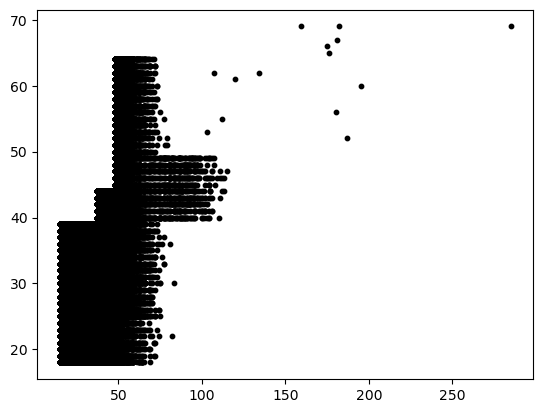

In [7]:

df = df_select.iloc[:, [0,1]].values
plt.scatter(df[:,0], df[:,1], s=10, c="black")

Elbow Method

/opt/homebrew/Caskroom/miniconda/base/envs/dataScience/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dataScience/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dataScience/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dataScience/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

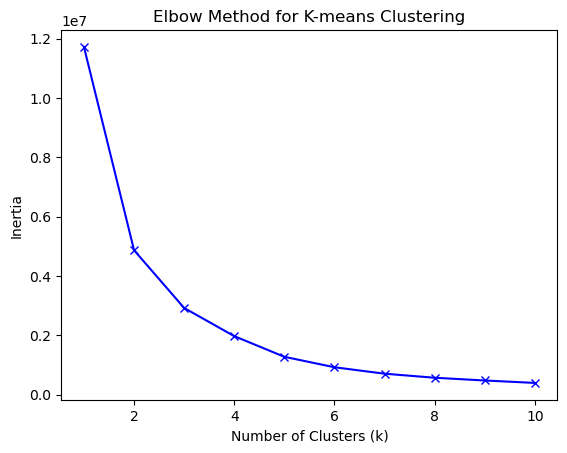

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the features for clustering
X = df_select['income'].values.reshape(-1, 1)

# Perform the elbow method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-means Clustering')
plt.show()


In [9]:
X

array([[86],
       [83],
       [82],
       ...,
       [15],
       [15],
       [15]])

In [10]:
df_select

,income,age
0,86,45
1,83,30
2,82,22
3,81,36
4,79,51
...,...,...
99995,15,38
99996,15,20
99997,15,32
99998,15,21


Crear los modelos

In [11]:

# Perform DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_select)

# Perform KMeans
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(df_select)

# Perform Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(df_select)

/opt/homebrew/Caskroom/miniconda/base/envs/dataScience/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Asignación de Labels

In [18]:
# Create a dictionary to map cluster labels to categories
label_dict = {0: 'c1', 1: 'c2', 2: 'c3', 3: 'c4'}

# Assign the cluster labels to categories
df_select['DBSCAN_Cluster'] = [label_dict.get(label) for label in dbscan_labels]
df_select['KMeans_Cluster'] = [label_dict.get(label) for label in kmeans_labels]
df_select['Hierarchical_Cluster'] = [label_dict.get(label) for label in hierarchical_labels]

df_select

,income,age,DBSCAN_Cluster,KMeans_Cluster,Hierarchical_Cluster
0,86,45,c1,c4,c1
1,83,30,None,c4,c1
2,82,22,None,c2,c1
3,81,36,None,c4,c1
4,79,51,None,c4,c1
...,...,...,...,...,...
99995,15,38,c1,c1,c2
99996,15,20,c1,c1,c2
99997,15,32,c1,c1,c2
99998,15,21,c1,c1,c2


In [13]:
# Assign 'None' values in clustering columns to a separate cluster
#df_select['DBSCAN_Cluster'].fillna('Not Assigned', inplace=True)
#df_select['KMeans_Cluster'].fillna('Not Assigned', inplace=True)
#df_select['Hierarchical_Cluster'].fillna('Not Assigned', inplace=True)

In [19]:
df_select

,income,age,DBSCAN_Cluster,KMeans_Cluster,Hierarchical_Cluster
0,86,45,c1,c4,c1
1,83,30,None,c4,c1
2,82,22,None,c2,c1
3,81,36,None,c4,c1
4,79,51,None,c4,c1
...,...,...,...,...,...
99995,15,38,c1,c1,c2
99996,15,20,c1,c1,c2
99997,15,32,c1,c1,c2
99998,15,21,c1,c1,c2


Visualización de los clusters

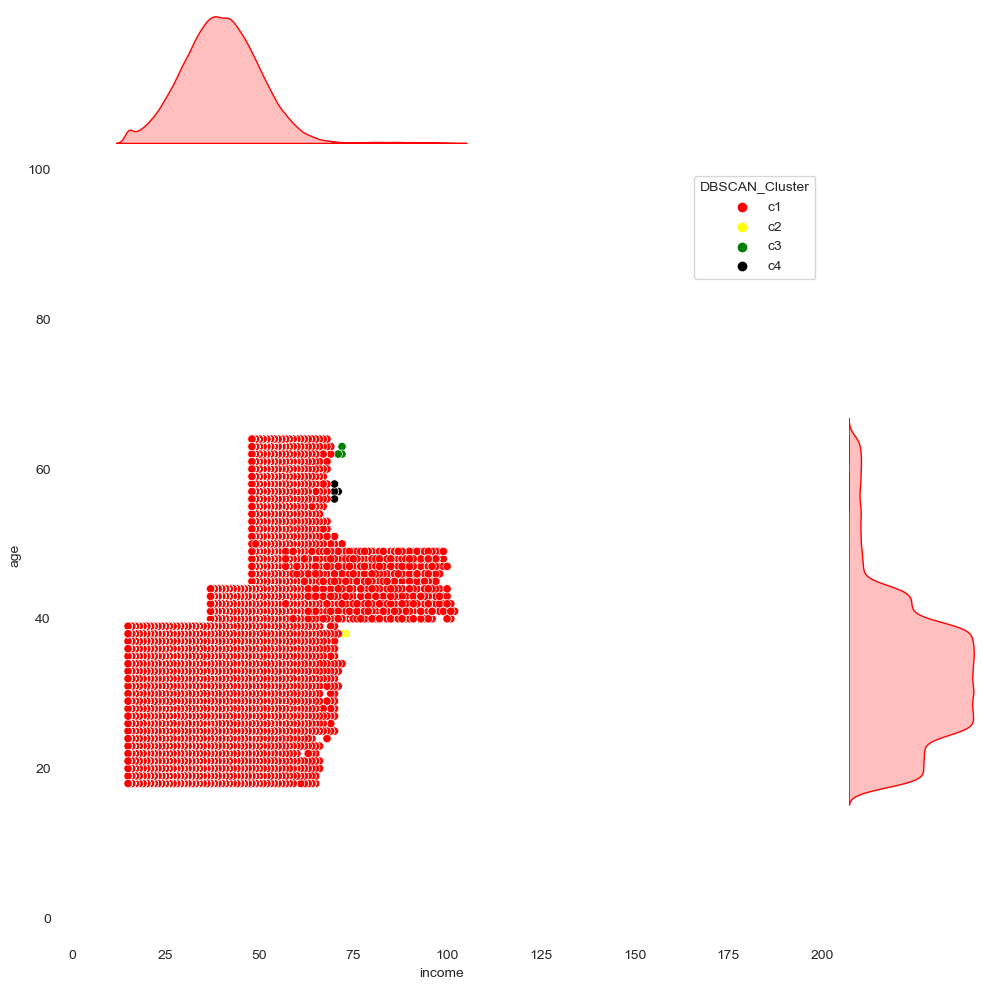

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette
sns.set_style('white')
color_dict = {'c1': 'red', 'c2': 'yellow', 'c3': 'green', 'c4': 'black'}

# Create the joint plot
joint_plot = sns.jointplot(x=df_select['income'], y=df_select['age'],
                           hue=df_select['DBSCAN_Cluster'], palette=color_dict,
                           xlim=(-3, 200), ylim=(-3, 100), height=10, ratio=5, marker='o')

# Remove the spines
sns.despine(left=True, bottom=True)

# Save the plot
joint_plot.savefig('scatter.png', transparent=True)

# Show the plot
plt.show()


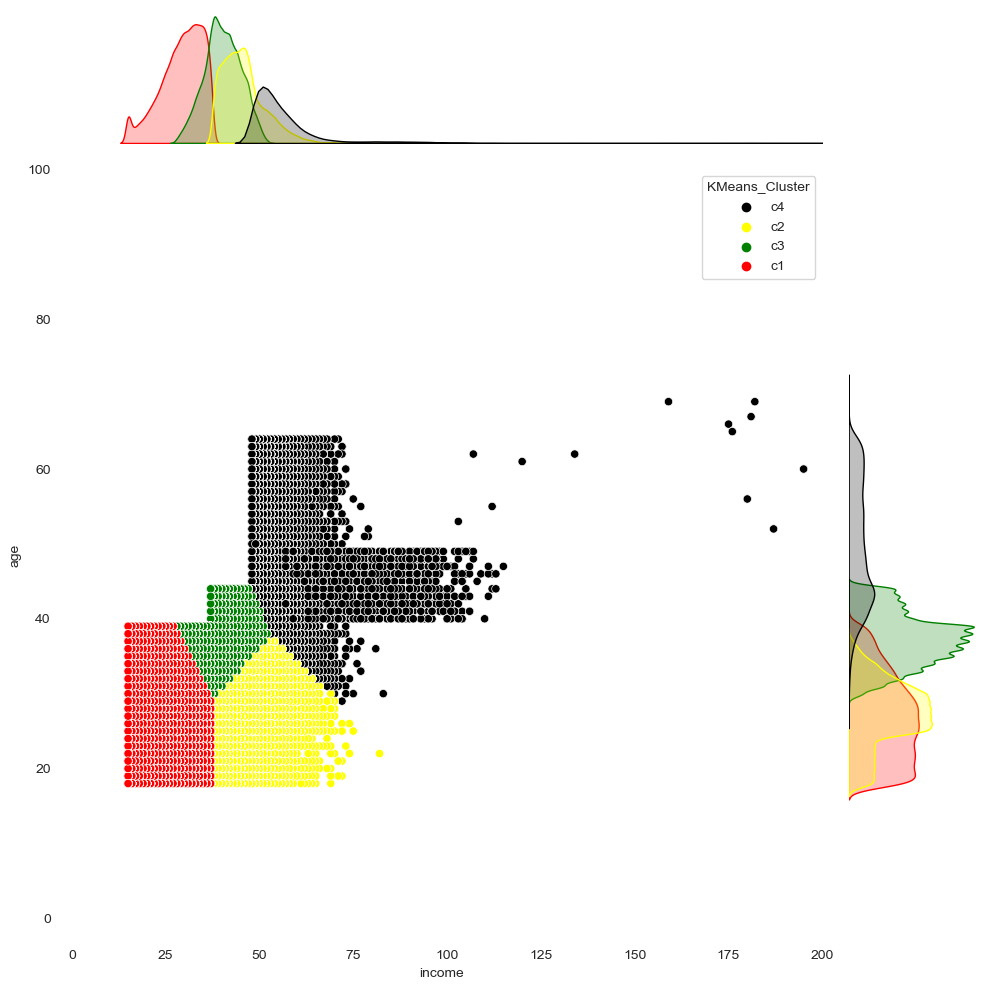

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette
sns.set_style('white')
color_dict = {'c1': 'red', 'c2': 'yellow', 'c3': 'green', 'c4': 'black'}

# Create the joint plot
joint_plot = sns.jointplot(x=df_select['income'], y=df_select['age'],
                           hue=df_select['KMeans_Cluster'], palette=color_dict,
                           xlim=(-3, 200), ylim=(-3, 100), height=10, ratio=5, marker='o')

# Remove the spines
sns.despine(left=True, bottom=True)

# Save the plot
joint_plot.savefig('scatter.png', transparent=True)

# Show the plot
plt.show()


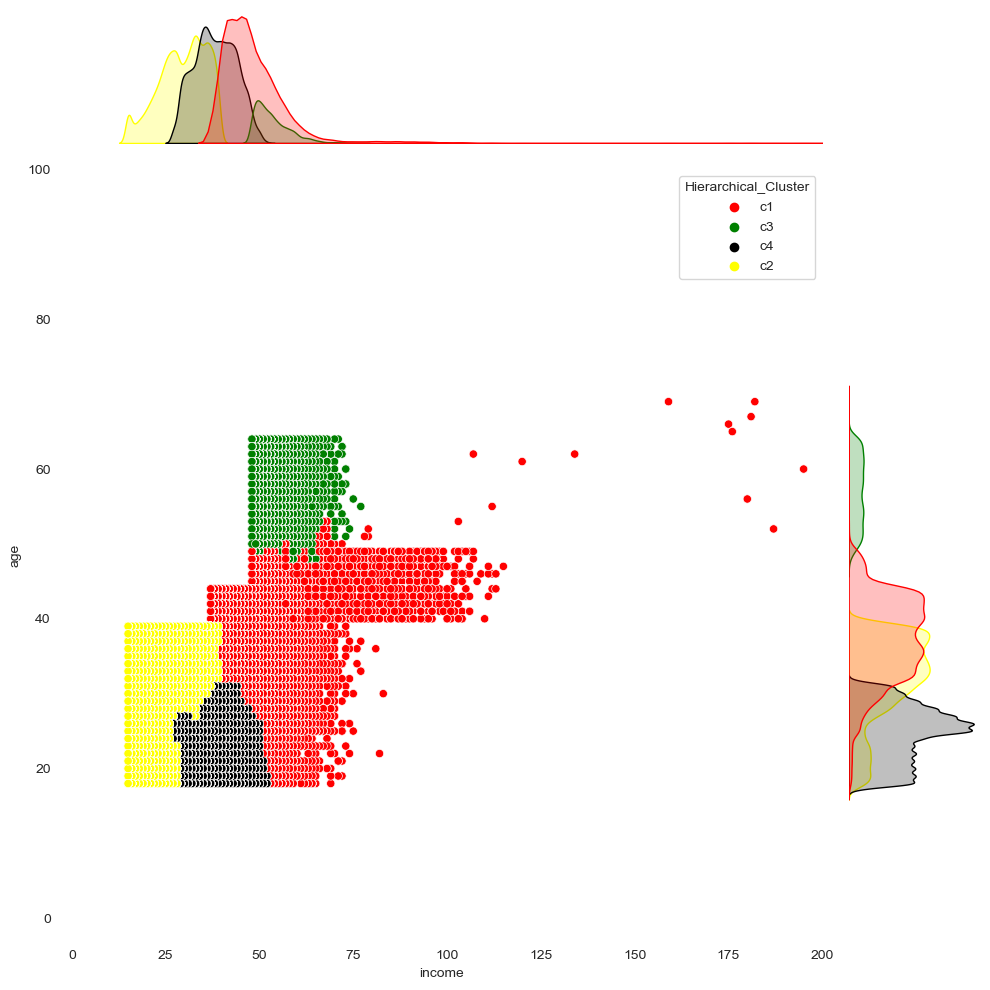

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

#Showing BDSCAN Graph

# Set the style and color palette
sns.set_style('white')
color_dict = {'c1': 'red', 'c2': 'yellow', 'c3': 'green', 'c4': 'black'}

# Create the joint plot
joint_plot = sns.jointplot(x=df_select['income'], y=df_select['age'],
                           hue=df_select['Hierarchical_Cluster'], palette=color_dict,
                           xlim=(-3, 200), ylim=(-3, 100), height=10, ratio=5, marker='o')

# Remove the spines
sns.despine(left=True, bottom=True)

# Save the plot
joint_plot.savefig('scatter.png', transparent=True)

# Show the plot
plt.show()
